# Quantification of immunofluorescence (+) area

In [1]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def QuanFluor(image, thres, autothres, channel):
    #Convert to gray scale
    imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Establish the threshold
    if 'no' in autothres: 
        Threshold, bi_image = cv2.threshold(imagegray, thres, 255, cv2.THRESH_BINARY)
        plt.figure(figsize = (10,10))
        plot = plt.imshow(bi_image, cmap = 'gray')
    
    elif 'yes' in autothres:
        thres = 0
        Threshold, bi_image = cv2.threshold(imagegray, thres, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        plt.figure(figsize = (10,10))
        plot = plt.imshow(bi_image, cmap = 'gray')
    
    for row in range(bi_image.shape[0]):
        for col in range(bi_image.shape[1]):
            if bi_image[row,col] == 0:
                image[row,col,0] = 0
                image[row,col,1] = 0
                image[row,col,2] = 0
    
    #Adapt mask to the image
    plt.figure(figsize = (10,10))
    plot1 = plt.imshow(image)
    
    #Quantification of pixels
    Total_red_pixels = 0
    Total_green_pixels = 0
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if 'green' in channel:
                Total_green_pixels = Total_green_pixels + image[row,col,1]
                Positive_immunofluorescence = round(Total_green_pixels / image.size, 2)
            elif 'red' in channel:
                Total_red_pixels = Total_red_pixels + image[row,col,0]
                Positive_immunofluorescence = round(Total_red_pixels / image.size, 2)
    
    return plot, plot1, print('Positive immunofluorescent area =', Positive_immunofluorescence)

# Working space

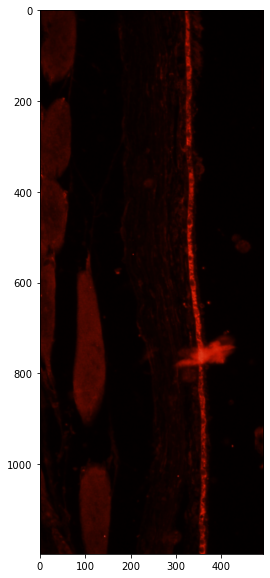

In [27]:
#Open and read image
file_name = 'Image_63213.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Inmunos\\rpe65\\control\\{}'.format(file_name)
cntr = cv2.imread(path)

cntrRGB = cv2.cvtColor(cntr, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(cntrRGB)

<Figure size 720x720 with 0 Axes>

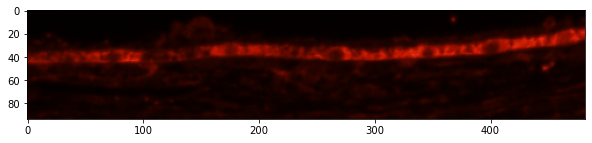

In [28]:
#MASK (FOR RPE CUANTIFICATION)
pathm = "C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Mascaras\\MASCARA 20X.tif"
mask = cv2.imread(pathm)

#MASK IN GRAY 
imagescale = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

#Show image in RGB
plt.figure(figsize = (10,10))
imageRGB = cv2.cvtColor(cntr, cv2.COLOR_BGR2RGB)
#plt.axvline(x = , color = "white")
#plt.axvline(x = , color = "white")

#Rotate the image
rotatedimage = cv2.rotate(cntrRGB, cv2.ROTATE_90_COUNTERCLOCKWISE)
y = 125
x = 200

#Crop of the image (height,width)
cntrfocus = rotatedimage[y:y+imagescale.shape[0],x:x+imagescale.shape[1]]
plt.figure(figsize = (10,10))
plt.imshow(cntrfocus)

Positive immunofluorescent area = 2.88


(<matplotlib.image.AxesImage at 0x236d00ce430>,
 None)

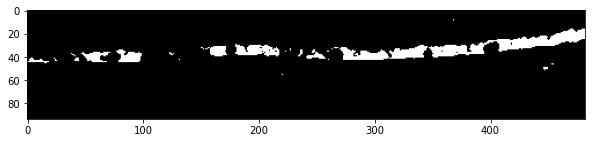

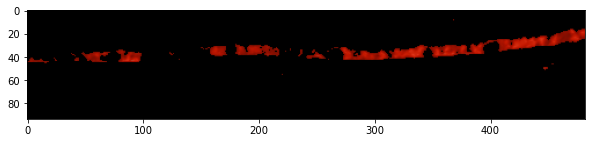

In [29]:
QuanFluor(cntrfocus, 20, 'no', 'red')

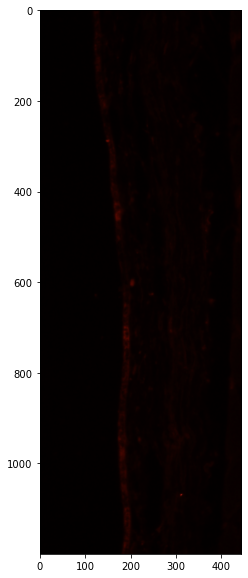

In [30]:
#Open and read image
file_name = 'Image_63220.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Inmunos\\rpe65\\scgx\\{}'.format(file_name)
treated = cv2.imread(path)

treatedRGB = cv2.cvtColor(treated, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(treatedRGB)

<Figure size 720x720 with 0 Axes>

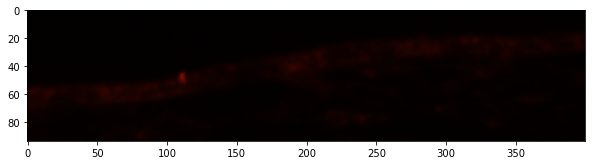

In [31]:
#MASK (FOR RPE CUANTIFICATION)
pathm = "C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Mascaras\\MASCARA 20X.tif"
mask = cv2.imread(pathm)

#MASK IN GRAY 
imagescale = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

#Show image in RGB
plt.figure(figsize = (10,10))
treatedRGB = cv2.cvtColor(treated, cv2.COLOR_BGR2RGB)
#plt.axvline(x = , color = "white")
#plt.axvline(x = , color = "white")

#Rotate the image
rotatedimage = cv2.rotate(treatedRGB, cv2.ROTATE_90_CLOCKWISE)
y = 100
x = 800

#Crop of the image (height,width)
treatedfocus = rotatedimage[y:y+imagescale.shape[0],x:x+imagescale.shape[1]]
plt.figure(figsize = (10,10))
plt.imshow(treatedfocus)

Positive immunofluorescent area = 0.0


(<matplotlib.image.AxesImage at 0x236cd3276d0>,
 None)

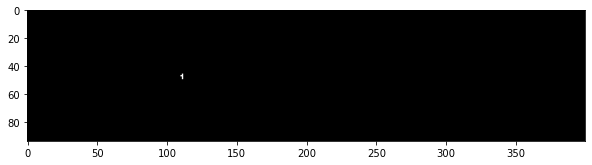

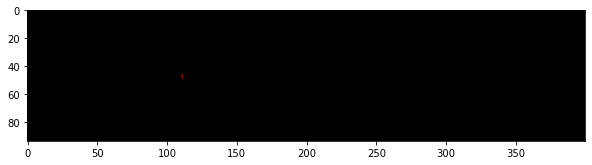

In [32]:
QuanFluor(treatedfocus, 20, 'no', 'red')